In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import sympy as sy
plt.style.use('ggplot')

This chapter focuses on the features of sampling distribution of OLS estimator. We would like to know that if OLS can provide us with unbiased, consistent and efficient estimates. 

# <font face="gotham" color="purple"> Unbaisedness of OLS </font>

In this chapter, we assume regression model has the form

$$
\boldsymbol{y} = \boldsymbol{X\beta} +\boldsymbol{u}, \quad \boldsymbol{u}\sim \text{IID}(\boldsymbol{0},\sigma^2\mathbf{I})   
$$

The notation $\text{IID}$ means **identically independent distributed**, $\sigma^2\mathbf{I}$ is the **covariance matrix**, being a diagonal matrix means regressors are independently distributed. We also assume all diagonal elements are the same, i.e. $\sigma^2$, which means **homoscedasticity**.  

If an estimator $\theta$ is unbiased, it should always satisfy the condition

$$
E(\hat{\theta}) -\theta_0 = 0
$$

To show that the OLS estimator is unbiased, we denote $\boldsymbol{\beta}_0$ as the true parameter in the _data generating process_ (DGP), that is to say, we would like to see $E(\boldsymbol{\hat{\beta}})=\boldsymbol{\beta}_0$.

To show the conditions that makes OLS unbiased, we substitute DGP back in OLS formula

\begin{align} 
\hat{\boldsymbol{\beta}}&= (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}\\
&=(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T(\boldsymbol{X}\boldsymbol{\beta}_0+u)\\
& = \boldsymbol{\beta}_0 + (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{u}
\end{align}

First, we assume $\boldsymbol{X}$ to be _nonstochastic_, also with assumption $E(\boldsymbol{u}) = 0$, we obtain

\begin{align}
E(\boldsymbol{\hat{\beta}}) &= \boldsymbol{\beta}_0 + (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{u}\\
 &= \boldsymbol{\beta}_0 + (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^TE(\boldsymbol{u})\\
 &=\boldsymbol{\beta}_0
\end{align}
However nonstochastic assumption is limited mostly in cross section data.

Second, we can assume $\boldsymbol{X}$  **exogenous**, such that $E(\boldsymbol{u}|\boldsymbol{X}) = 0$, also proves $E(\boldsymbol{\hat{\beta}})=\boldsymbol{\beta}_0$. Exogeneity simply means that the randomness of $\boldsymbol{X}$ has nothing to do with $\boldsymbol{u}$.

We have even weaker version of exogeneity, $E(u_t|\boldsymbol{X}_t) = 0$, which excludes the possibility that $u_t$ might depend on $X_{t-1}$ or $X_{t-2}$, etc. It is called **predeterminedness condition**, which is suitable for time series data.

However, for time series data, OLS shall be used with cautions, it is widely known that OLS is not suitable for $\text{ARMA}$ model, because $\boldsymbol{y}$ has lagged dependent variables.

For $\text{VAR}$, OLS is a common practice, because it doesn't differentiate endogenous and exogenous variables.

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
  <h4>Predetermined Variable vs Exogenous Variable</h4>
In strictly speaking, <i>predetermined variables</i> has two categories: <i>exogenous variables</i> and <i>predetermined endogenous variables</i>.<br><br>
    
The former one can either be current or lagged, as long as it doesn't evolve with model's dynamics. The latter one is common in autoregressive models.
</div> 

# <font face="gotham" color="purple"> Consistency of OLS </font>

Consistency means the estimates tends to the quantity of true parameters as sample tends to infinity. Now let's show why OLS estimator is consistent. Start from 

$$
\boldsymbol{\hat{\beta}} = \boldsymbol{\beta}_0 + (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{u} \label{1}\tag{1}
$$

We would to like to know if $\text{plim}\boldsymbol{\hat{\beta}} = \boldsymbol{\beta}_0$, which boils down to verify if

$$
\text{plim}(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{u} =0 \label{2}\tag{2}
$$

However $\boldsymbol{X}^T\boldsymbol{X}$ and $\boldsymbol{X}^Tu$ do not have probability limit even if $n \rightarrow \infty$.

Modify the probability limit we obtain

$$
\bigg(\text{plim}\frac{1}{n}\boldsymbol{X}^T\boldsymbol{X}\bigg)^{-1}\text{plim}\frac{1}{n}\boldsymbol{X}^T\boldsymbol{u} =0 
$$

We assume a weaker version of exogeneity $E(u_t|X_t) = 0$, so is $E(X_t^Tu_t|X_t)=0$, law of iterated expectation tells that $E(X_t^Tu_t)=0$. To summarize

$$
\text{plim}\frac{1}{n}\boldsymbol{X}^T\boldsymbol{u}=\text{plim}\frac{1}{n}\sum_{t=1}^nX_t^T u_t = 0 
$$

which proves the consistency of OLS.

## <font face="gotham" color="purple"> Simulation of Consistency of OLS </font>

Here we can demonstrate a simple Monte Carlo simulation with true parameters $\boldsymbol{\beta}_0 = [2, 3, 4, 5]^T$, we increase sample size from $5$ to $100$ with a unit increment in each loop, and also with each sample size we redraw the disturbance term $10$ times, you can experiment with codes below, they might not be concise but considerably intuitive. Pay attention to the plots how they approach the true parameters as sample sizes increase.

In [2]:
sampl_size = np.arange(5, 100)
re_draw = 10

beta_array = np.array([2, 3, 4, 5])
beta_array = beta_array[np.newaxis, :].T

beta_hat_mean = []
for i in sampl_size:
    const = np.ones(i)
    const = const[np.newaxis, :]

    X_inde = np.random.randn(3, i)
    X = np.concatenate((const.T, X_inde.T), axis=1)
    
    beta_hat = []
    for j in range(re_draw):
        u = np.random.randn(i)
        u = u[np.newaxis, :].T
        y = X@beta_array + u
        beta_hat.append(np.linalg.inv(X.T@X)@X.T@y)
    beta_hat = np.array(beta_hat).T
    beta_hat_mean.append(np.mean(beta_hat[0], axis = 1))

beta0, beta1, beta2, beta3 = [], [], [], []
for i in beta_hat_mean:
    beta0.append(i[0])
    beta1.append(i[1])
    beta2.append(i[2])
    beta3.append(i[3])

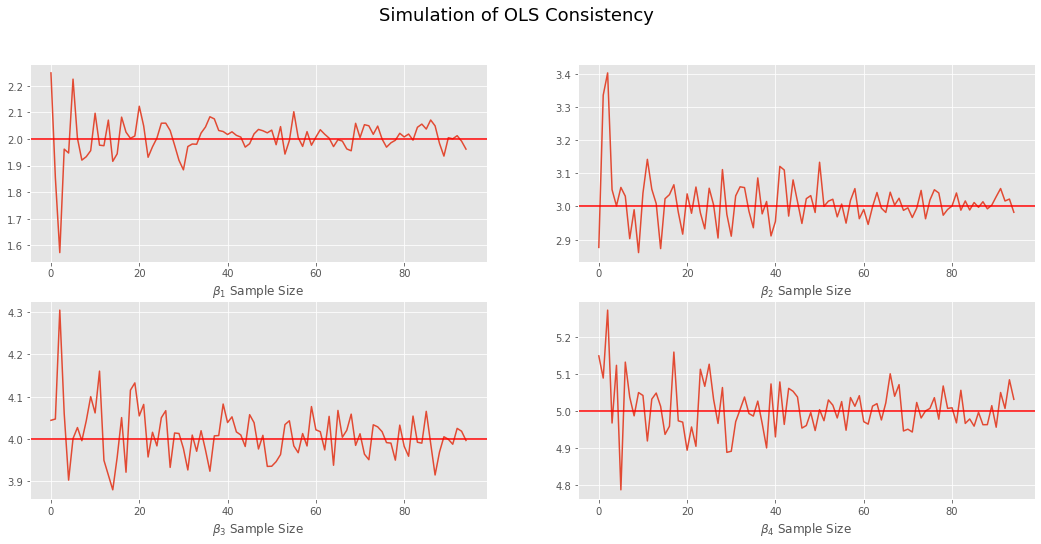

In [3]:
fig, ax = plt.subplots(figsize =(18, 8), nrows = 2, ncols=2)
fig.suptitle('Simulation of OLS Consistency', size = 18)
ax[0,0].plot(beta0)
ax[0,0].axhline(2, color ='r')
ax[0,0].set_xlabel(r'$\beta_1$ Sample Size')

ax[0,1].plot(beta1)
ax[0,1].axhline(3, color ='r')
ax[0,1].set_xlabel(r'$\beta_2$ Sample Size')

ax[1,0].plot(beta2)
ax[1,0].axhline(4, color ='r')
ax[1,0].set_xlabel(r'$\beta_3$ Sample Size')

ax[1,1].plot(beta3)
ax[1,1].axhline(5, color ='r')
ax[1,1].set_xlabel(r'$\beta_4$ Sample Size')
plt.show()

# <font face="gotham" color="purple"> Efficiency of the OLS </font>

The **efficiency** of estimator represents the capacity of utilizing the information efficiently. For instance, OLS is more efficient than many other estimators, because with the same sample size, OLS yields the estimates with highest precision.

## <font face="gotham" color="purple"> Positive Definite Matrices </font>

Before moving any further, we will refresh the definition of positive definite matrices. 

A **quadratic form** is a function with form $Q(\mathbf{x})=\mathbf{x}^TA\mathbf{x}$, where $A$ is an $n\times n$ symmetric matrix, which is called the **the matrix of the quadratic form**. For more details, check <a href='https://nbviewer.org/github/WeijieChen-MacroAnalyst/Linear_Algebra_With_Python/blob/master/Chapter%2017%20-%20Symmetric%20Matrices%20%2C%20Quadratic%20Form%20and%20Cholesky%20Decomposition.ipynb'>linear algebra material</a>.

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
Now some terms to need to be defined, a quadratic form $Q$ is:<br>
<ol>
    <li>positive definite if $Q(\mathbf{x})>0$ for all $\mathbf{x} \neq \mathbf{0}$</li>
    <li>negative definite if $Q(\mathbf{x})<0$ for all $\mathbf{x} \neq \mathbf{0}$</li>
    <li>positive semidefinite if $Q(\mathbf{x})\geq0$ for all $\mathbf{x} \neq \mathbf{0}$</li>
    <li>negative semidefinite if $Q(\mathbf{x})\leq0$ for all $\mathbf{x} \neq \mathbf{0}$</li>
    <li>indefinite if $Q(\mathbf{x})$ assumes both positive and negative values.</li>
</ol>
</div> 

If $B$ is an $m\times n$ matrix, both $B^TB$ and $BB^T$ yield symmetric matrices. Here is an example of $B_{3\times 2}$

In [4]:
B = sy.Matrix([[1, -1], [3, 4], [0, 2]]); B

Matrix([
[1, -1],
[3,  4],
[0,  2]])

$B^TB$ yields a $2\times2$ matrix

In [5]:
B.T*B

Matrix([
[10, 11],
[11, 21]])

$BB^T$ yields a $3\times3$ matrix

In [6]:
B*B.T

Matrix([
[ 2, -1, -2],
[-1, 25,  8],
[-2,  8,  4]])

Since $B^TB$ and $BB^T$ are both symmetric, $A$ can be replaced by either of them, technically the **Cholesky decomposition** can achieve $A = BB^T$ or $A = B^TB$.

Actually any matrix of form $B^TB$ or $BB^T$ is positive semidefinite, to see this, observe that
$$
x^TB^TBx = (Bx)^T(Bx) = \|Bx\|^2 \geq 0\\
xBB^Tx^T = xB (xB)^T = \|xB\|^2\geq 0
$$
where $x\neq0$.

In practice, the second form is quite rare, so we focus the on the first form $x^TB^TBx$, since $x\neq 0$, the only condition of $\|Bx\|^2 = 0$ is $B$ does not have **full rank**, in other words, if $B$ has full rank, then $B^TB$ is positive definite rather than positive semidefinite.

## <font face="gotham" color="purple"> Covariance Matrix of the OLS Parameter Estimates </font>

The covariance matrix of error term is 

$$
\text{Var}(\boldsymbol{u}) = E(\boldsymbol{u}\boldsymbol{u}^T) = \sigma^2_0\mathbf{I}
$$
where $\sigma^2_0\mathbf{I}$ is a positive definite matrix
$$
\boldsymbol{x}^{T} \sigma_0^2\mathbf{I} \boldsymbol{x}=\sigma_0^2\sum_{i=1}^{k} x_{i}^{2}
$$
Now we can construct covariance matrix of $\boldsymbol{\hat{\beta}}$, from discussions above we know $\boldsymbol{\hat{\beta}}- \boldsymbol{\beta}_0 = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{u}$, therefore

\begin{align} 
\text{Var}(\boldsymbol{\hat{\beta}}) = E\big[(\boldsymbol{\hat{{\beta}}}-\boldsymbol{\beta_{0}})(\boldsymbol{\hat{{\beta}}}-\boldsymbol{{\beta}}_{0})^{T}\big]&=
(\boldsymbol{X}^{\top} \boldsymbol{X})^{-1} \boldsymbol{X}^{T}E( \boldsymbol{u} \boldsymbol{u}^{T}) \boldsymbol{X}(\boldsymbol{X}^{T} \boldsymbol{X})^{-1}\\
&=(\boldsymbol{X}^{\top} \boldsymbol{X})^{-1} \boldsymbol{X}^{T}\sigma_0^2\mathbf{I} \boldsymbol{X}(\boldsymbol{X}^{T} \boldsymbol{X})^{-1}\\
& = \sigma_0^2 (\boldsymbol{X}^{\top} \boldsymbol{X})^{-1}
\end{align}
which is the standard result for the covariance matrix of $\boldsymbol{\hat{\beta}}$.

It is illuminating if we rewrite the last equation, 

$$
\text{Var}(\boldsymbol{\hat{\beta}})  =\frac{1}{n}\sigma_0^2 \left(\frac{1}{n}\boldsymbol{X}^{\top} \boldsymbol{X}\right)^{-1}
$$

We need to make one extra assumption to interprete the equation properly, that is

$$
\text{plim}\left(\frac{1}{n}\boldsymbol{X}^{T} \boldsymbol{X}\right)^{-1} = \boldsymbol{S}_{\boldsymbol{X}^{T} \boldsymbol{X}}
$$

where $\boldsymbol{S}_{\boldsymbol{X}^{T} \boldsymbol{X}}$ is a nonstochastic matrix with full rank $k$.

Thus we get a different form of variance of OLS estimator

$$
\text{Var}(\boldsymbol{\hat{\beta}})  =\frac{\sigma_0^2}{n} \boldsymbol{S}_{\boldsymbol{X}^{T} \boldsymbol{X}}
$$

if we double the $\sigma_0^2$ or double the sample size $n$, the variance of $\boldsymbol{\hat{\beta}}$ will be doubled and halfed respectively.

And standard errors is

$$
\sigma_\hat{\beta}=\frac{\sigma_0}{\sqrt{n}}\sqrt{\boldsymbol{S}_{\boldsymbol{X}^{T} \boldsymbol{X}}}
$$

For your reference, in basic statistics, we use formula for variance of sample means

$$
\sigma_{\bar{x}}=\frac{\sigma_0}{\sqrt{n}}
$$

Apart from $n$ and $\sigma_0^2$, the third factor which influences $\text{Var}(\boldsymbol{\hat{\beta}})$ is  $\boldsymbol{X}$. To see this, we partition $\boldsymbol{\beta}$ into $[{\beta}_1\quad\boldsymbol{\beta}_2]$, where $\boldsymbol{\beta}_2$ denotes the $(k-1)$-vector. The linear regression model rewritten as

$$
\boldsymbol{y} = \boldsymbol{x}_1\beta_1+\boldsymbol{X}_2\boldsymbol{\beta}_2+\boldsymbol{u}
$$

Use $\text{FWL}$ regression

$$
\boldsymbol{M}_2\boldsymbol{y}= \boldsymbol{M}_2\boldsymbol{x}_1\beta_1 + \boldsymbol{v}
$$

where $\boldsymbol{M}_2$ means projection off $\boldsymbol{X}_2$.

According to OLS formula $\boldsymbol{\hat{\beta}}= \boldsymbol{(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}}$

$$
\hat{\beta}_1 = (\boldsymbol{x}_1^T\boldsymbol{M}_2\boldsymbol{x}_1)^{-1}\boldsymbol{x}_1^T\boldsymbol{M}_2\boldsymbol{y}=\frac{\boldsymbol{x}_1^T\boldsymbol{M}_2\boldsymbol{y}}{\boldsymbol{x}_1^T\boldsymbol{M}_2\boldsymbol{x}_1}
$$

And use variance formula $\text{Var}(\boldsymbol{\hat{\beta}}) = \sigma_0^2 (\boldsymbol{X}^{\top} \boldsymbol{X})^{-1}$, we get

$$
\text{Var}(\boldsymbol{\hat{\beta}}_1) = \sigma_0^2\left(\boldsymbol{x}_1^T\boldsymbol{M}_2\boldsymbol{x}_1\right)^{-1}=\frac{\sigma_0^2}{\boldsymbol{x}_1^T\boldsymbol{M}_2\boldsymbol{x}_1}
$$

Also note that denominator of $\text{FWL}$ $\text{Var}(\boldsymbol{\hat{\beta}}_1)$ is actually $\|\boldsymbol{M}_2\boldsymbol{x}_1\|^2$. The geometric interpretation of precision (the inverse of variance) is provided in next section.

## <font face="gotham" color="purple"> Multicollinearity and Visualization </font>

The formula of $\text{FWL}$ $\text{Var}(\boldsymbol{\hat{\beta}})$ raises the problem of multicollinearity, which means that one or some of regressors have strong correlation with rest.

Here we visualize the subspace $\text{span}({x}_1,\ \boldsymbol{X}_2)$ prepared for $\text{FWL}$ regression above.

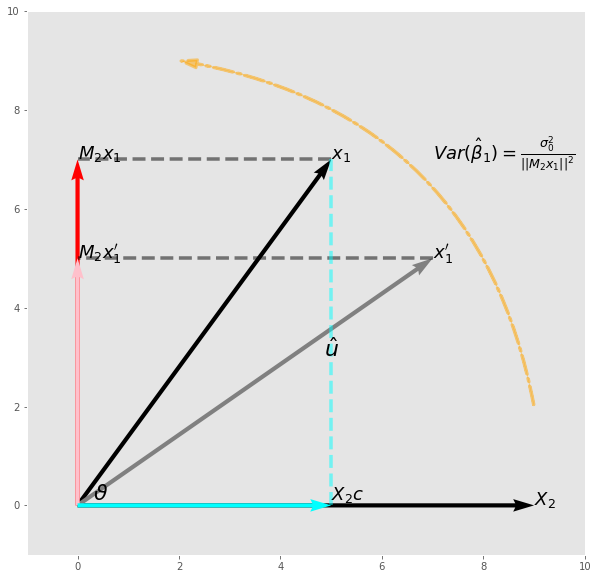

In [7]:
fig, ax = plt.subplots(figsize = (10, 10))

basis = np.array([[0, 0, 5, 7], [0, 0, 9, 0]])
X, Y, U, V = zip(*basis)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1) 

M2x1 = np.array([[0, 0, 0, 7]])
X, Y, U, V = zip(*M2x1)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red') 

x1_apos = np.array([[0, 0, 7, 5]])
X, Y, U, V = zip(*x1_apos)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'gray') 

M2x1_apos = np.array([[0, 0, 0, 5]])
X, Y, U, V = zip(*M2x1_apos)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'pink') 

X2c = np.array([[0, 0, 5, 0]])
X, Y, U, V = zip(*X2c)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'aqua') 

point1 = [7, 5]
point2 = [0, 5]
line = np.array([point1, point2])
ax.plot(line[:,0], line[:,1], c = 'k', lw = 3.5,alpha =0.5, ls = '--')

point1 = [5, 7]
point2 = [0, 7]
line = np.array([point1, point2])
ax.plot(line[:,0], line[:,1], c = 'k', lw = 3.5,alpha =0.5, ls = '--')

point1 = [5, 0]
point2 = [5, 7]
line = np.array([point1, point2])
ax.plot(line[:,0], line[:,1], c = 'aqua', lw = 3.5,alpha =0.5, ls = '--')

ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
#plt.draw()
ax.grid()


ax.text(5, 7, r'$x_1$', size = 18)
ax.text(9, 0, r'$X_2$', size = 18)
ax.text(0, 7, r'$M_2 x_1$', size = 18)
ax.text(7, 5, r'$x_1^\prime$', size = 18)
ax.text(0, 5, r'$M_2 x_1^\prime$', size = 18)
ax.text(7, 7, r'$Var(\hat{\beta}_1)=\frac{\sigma_0^2}{\|\|M_2x_1\|\|^2}$', size = 18)
ax.text(.3, .1, r'$\vartheta$', size = 22)
ax.text(5, 0.1, r'$X_2c$', size = 18)
ax.text(4.85, 3, r'$\hat{u}$', size = 22)

style = 'Simple, tail_width=0.5, head_width=8, head_length=16'
kw = dict(arrowstyle=style, color='orange', ls = '-.', alpha = .5, lw = 3)
arrow = mpl.patches.FancyArrowPatch((9,2),(2,9), connectionstyle='arc3,rad=.35', **kw)
ax.add_patch(arrow)

plt.show()

As we can see from the graph, if the length $\|\boldsymbol{M}_2{x_1}\|$ is becoming longer means that the angle $\vartheta$ is increasing on condition that $\|x_1\|$ remain the same.

From linear algebra course, we know the formula

$$
\cos{\vartheta} = \frac{\boldsymbol{u}\cdot\boldsymbol{v}}{\|\boldsymbol{u}\|\|\boldsymbol{v}\|}
$$

which is exactly the correlation coefficient. The larger the angle, the lower the correlation, i.e. smaller $\cos{\vartheta}$.

In this example, if $\boldsymbol{x}_1$ is highly correlated with $\boldsymbol{X}_2$, then $\vartheta$ must be relatively small, therefore $\text{Var}(\hat{\beta})$ is relatively high. This is what we call multicollinearity in practice, though it is not really collinear, rather, approximately pointing to the same direction.

But remember this, multicollinearity always presents, but in a matter of degree, not yes or no.

We can also interpret the graph by using a standard regression model

$$
\boldsymbol{x}_1 = \boldsymbol{X}_2c + \hat{u}
$$

where $\hat{u} = \boldsymbol{M}_2\boldsymbol{x}_1$. 

## <font face="gotham" color="purple"> Comparing Precision of Estimators </font>

If estimator $\boldsymbol{\hat{\beta}}$ is more precise than $\boldsymbol{\tilde{\beta}}$, the difference between them
$$
\text{Var}(\boldsymbol{\tilde{\beta}})- \text{Var}(\boldsymbol{\hat{\beta}})
$$
is a positive semidefinite matrix.

Also any linear combination of $w^T\boldsymbol{\hat{\beta}}$ is also more efficient than $w^T\boldsymbol{\tilde{\beta}}$, because $\text{Var}(w^T\beta)=w^T\text{Var}(\beta)w$
$$
\boldsymbol{w}^{\top} \operatorname{Var}(\tilde{\boldsymbol{\beta}}) \boldsymbol{w}-\boldsymbol{w}^{\top} \operatorname{Var}(\hat{\boldsymbol{\beta}}) \boldsymbol{w}=\boldsymbol{w}^{\top}(\operatorname{Var}(\tilde{\boldsymbol{\beta}})-\operatorname{Var}(\hat{\boldsymbol{\beta}})) \boldsymbol{w}\geq0
$$

## <font face="gotham" color="purple"> The Gauss-Markov Theorem </font>

The principal result on efficiency of OLS estimator is called the **Gauss-Markov Theorem**. The informal way of stating this theorem is to say that $\hat{\beta}$ is the **best linear unbiased estimator**.

Formally, if these two conditions are satisfied

1. $E(\boldsymbol{u}|\boldsymbol{X})=\boldsymbol{0}$
2. $E(\boldsymbol{u}\boldsymbol{u}^T)=\sigma^2\mathbf{I}$ (homoskedasticity and uncorrelated $u_t$)

in the linear regression model, then OLS estimator $\boldsymbol{\hat{\beta}}$ is more efficient than any other $\boldsymbol{\tilde{\beta}}$, i.e. $\text{Var}(\boldsymbol{\hat{\beta}}) - \text{Var}(\boldsymbol{\tilde{\beta}})$ is a positive semidefinite matrix. 

# <font face="gotham" color="purple"> Residuals and Disturbance Terms </font>

We have discussed geometric and numerical properties of $\hat{\boldsymbol{u}}$ in last chapter, here we will discuss the properties of $\hat{\boldsymbol{u}}$.

One important insight from geometric view of OLS is 
$$
\|\boldsymbol{u}\| \geq \|\boldsymbol{\hat{u}}\| 
$$
which is a direct deduction of $\boldsymbol{\hat{u}}=\boldsymbol{M_Xu}$. 

## <font face="gotham" color="purple"> Expectation of Residuals </font>

Consider two matrices $\boldsymbol{A}_{n\times m}$ and $\boldsymbol{B}_{m \times k}$, then the $i^{th}$ row of $\boldsymbol{AB}$ is the product of $i^{th}$ row of $\boldsymbol{A}$ and entire $\boldsymbol{B}$, if we want to represent the $t^{th}$ row of $\boldsymbol{AB}$ we can use 

$$
\boldsymbol{A}_t\boldsymbol{B}
$$

where $\boldsymbol{A}_t$ is the $t^{th}$ row of $\boldsymbol{A}$.

In general we can represent $t^{th}$ row of a product of matrices by picking out the $t^{th}$ row of the leftmost matrix.

Using this fact, we can denote the $t^{th}$ residual as

$$
\hat{u}_t = \boldsymbol{M_X}\boldsymbol{u} = (\mathbf{I}-\boldsymbol{P_X})\boldsymbol{u} = u_t - \boldsymbol{X}_t(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{u}
$$

Although in Gauss-Markov Theorem, we assume the elements in error terms are independent, but this is not the case among residuals. 

It is clear $\boldsymbol{\hat{u}}$ is a linear combination of $\boldsymbol{u}$ i.e. $\boldsymbol{M_Xu}$, so the $E(\boldsymbol{\hat{u}}) = \boldsymbol{0}$.

## <font face="gotham" color="purple"> Variance of Residuals </font>

Use the variance formula on $\boldsymbol{\hat{u}}$

\begin{align}
\text{Var}(\boldsymbol{\hat{u}})&= \text{Var}(\boldsymbol{M_X}\boldsymbol{{u}}) = E[(\boldsymbol{M_X u}- E(\boldsymbol{M_X u}))(\boldsymbol{M_X u}- E(\boldsymbol{M_X u})^T)]\\
&= E(\boldsymbol{M_X}\boldsymbol{u}\boldsymbol{u}^T\boldsymbol{M_X}) = \boldsymbol{M_X}E(\boldsymbol{u}\boldsymbol{u}^T)\boldsymbol{M_X} = \boldsymbol{M_X}\text{Var}(\boldsymbol{u})\boldsymbol{M_X}\\
& = \boldsymbol{M_X}(\sigma_0^2\mathbf{I})\boldsymbol{M_X}\\
& = \sigma_0^2 \boldsymbol{M_X}
\end{align}

Obviously, $\boldsymbol{M_X}$ is not an identity matrix, which means that variances of $\hat{u}_t$ might not be homoscedasticity, also $E(u_tu_s)\neq 0$, i.e. the residuals are correlated.

We have denoted the $t^{th}$ diagonal element of $\boldsymbol{P_X}$ as $h_t$, then the $t^{th}$ diagonal element of $\boldsymbol{M_X}$ is $1-h_t$. In last chapter, we have shown that $0 \leq h_t < 1$, hence $0 \leq 1- h_t < 1$

$$
\text{Var}(\hat{u}_t)<\sigma_0^2
$$

The variance of any residual from OLS is always smaller than variance of disturbance term, this feature determined by the mechanism of OLS algorithm.

## <font face="gotham" color="purple"> Estimating the Variance of Error Terms </font>

We do not observe the disturbance terms $u_t$, neither does $\sigma^2_0$. But we are able to estimate it by method of moments.

The simplest estimator of $\sigma^2_0$ is 

$$
\hat{\sigma}^2 = \frac{1}{n}\sum_{t=1}^n\hat{u}_t^2
$$

However we have shown $\text{Var}(\hat{u}_t)<\sigma_0^2$, so $\hat{\sigma}^2$ must be biased downward.

Before showing how to neutralize the bias, here is a side note about the trace of matrices.

### <font face="gotham" color="purple"> The Trace of Matrices </font>

The trace is the sum of the elements on the principal diagonal of a $n\times n$ matrix, denoted $\text{Tr}(\boldsymbol{A})$. And it can be a product of any two matrices $\boldsymbol{A}_{n\times m} \boldsymbol{B}_{m \times n}$. But there is a convenient property called **cyclic permutation**.

$$
\text{Tr}(\boldsymbol{ABC}) = \text{Tr}(\boldsymbol{CAB}) = \text{Tr}(\boldsymbol{BCA})
$$

Because $\boldsymbol{P_X}$ is a square matrix, we can use the formula onto $\boldsymbol{P_X}$ and we can show that

$$
\text{Tr}(\boldsymbol{P_X})= \text{Tr}(\boldsymbol{X}(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T) =   \text{Tr}(\boldsymbol{X}^T\boldsymbol{X}(\boldsymbol{X}^T\boldsymbol{X})^{-1}) =  \text{Tr}(\mathbf{I}_k) = k
$$

### <font face="gotham" color="purple"> Unbiased Estimator of Variance of Error Term </font>

Let's process with $\hat{\sigma}^2$ by taking expectation

$$
E(\hat{\sigma}^2) = \frac{1}{n}\sum_{t=1}^nE(\hat{u}_t^2)
$$

Use the fact that $\text{Var}(\hat{u}_t) = E[(\hat{u}_t- E(\hat{u}_t))^2] = E[(\hat{u}_t)^2] = (1-h_t)\sigma_0^2$ and $\text{Tr}(\mathbf{I}_k)=k$

$$
\frac{1}{n}\sum_{t=1}^nE(\hat{u}_t^2) = \frac{1}{n}\sum_{t=1}^n(1-h_t)\sigma_0^2=\frac{n-k}{n}\sigma_0^2
$$

We have the unbiased estimator of $\sigma^2$

$$
s^2 = \frac{1}{n-k}\sum_{t=1}^nE(\hat{u}_t^2)= \frac{1}{n-k}\sum_{t=1}^n\hat{u}_t^2
$$

And now we can replace the $\sigma_0^2$ in the $\text{Var}(\boldsymbol{\hat{\beta}}) = \sigma_0^2(\boldsymbol{X^TX})^{-1}$, the principal diagonal holds the **standard error** of $\boldsymbol{\hat{\beta}}$.

$$
\widehat{\text{Var}}(\boldsymbol{\hat{\beta}}) = s^2(\boldsymbol{X^TX})^{-1}
$$

### <font face="gotham" color="purple"> Numerical Example of Residuals </font>

Use the function that I wrote in ```linregfunc.py```, we can do a quick simulation comparing the modulus of residuals and disturbance term.

In [6]:
import linregfunc as lr

In [9]:
X = lr.gen_X(100, 5)
beta = lr.gen_beta([3, 4, 5, 6, 7])
u = lr.gen_u(100)

y = X@beta + u

In [10]:
beta_hat = lr.ols(y, X)

In [11]:
y_fitted = X@beta_hat

In [12]:
residuals = y - y_fitted

In [13]:
print('The moduduls of residual: {:.4f}'.format(np.linalg.norm(residuals)))
print('The moduduls of disturbance term: {:.4f}'.format(np.linalg.norm(u)))

The moduduls of residual: 10.3170
The moduduls of disturbance term: 10.5496


How to simulate this?
$$
\text{Var}(\hat{u}_t)<\sigma_0^2
$$

The function, which generates disturbance terms, follows a standard normal distribution, i.e. $\sigma_0^2=1$. $\hat{u}_t$ is a specific term of the residual vector, for instance to estimate the variance of $\hat{u}_1$, we simulate the estimation process $100$ times, then calculate the variance from those $100$ $\hat{u}_1$'s.

In [7]:
X = lr.gen_X(100, 5)
proj_matM = lr.proj_mat_M(X)

In [47]:
beta = lr.gen_beta([3, 4, 5, 6, 7])
resid_array = np.zeros([100, 1])
for i in range(10000):
    u = lr.gen_u(100)
    resid = proj_matM@u
    resid_array = np.concatenate((resid_array, resid), axis = 1)
resid_array = resid_array[:, 1:]

Because this is simulation, the outcomes will be a frequency distribution rather than a single number. Here is the histogram, obviously the mean is less than $1$ as we expected.

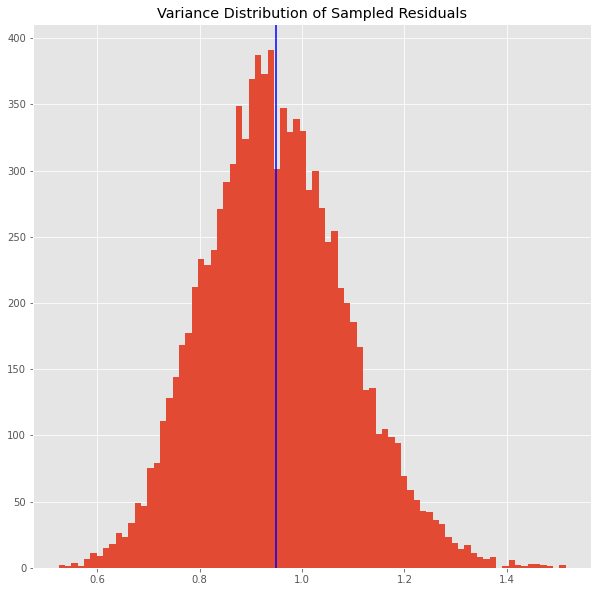

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(np.var(resid_array, axis = 0), bins= 80)
ax.axvline(x = np.mean(np.var(resid_array, axis = 0)), color = 'blue')
ax.set_title('Variance Distribution of Sampled Residuals')
plt.show()